In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from data.MMNIST.mmnist import *
from model_eval.metrices import *
from eval import *

%load_ext autoreload
%autoreload 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
evaluation = eval(model_path="/home/dhagash/Projects/video-prediction/checkpoints/mmnist_resnet_2_lpips_resnet_convlstm/model_90.pth")

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/dhagash/anaconda3/envs/dl/lib/python3.9/site-packages/lpips/weights/v0.1/vgg.pth


100%|██████████| 625/625 [11:57<00:00,  1.15s/it]


In [3]:
evaluation.save_data()

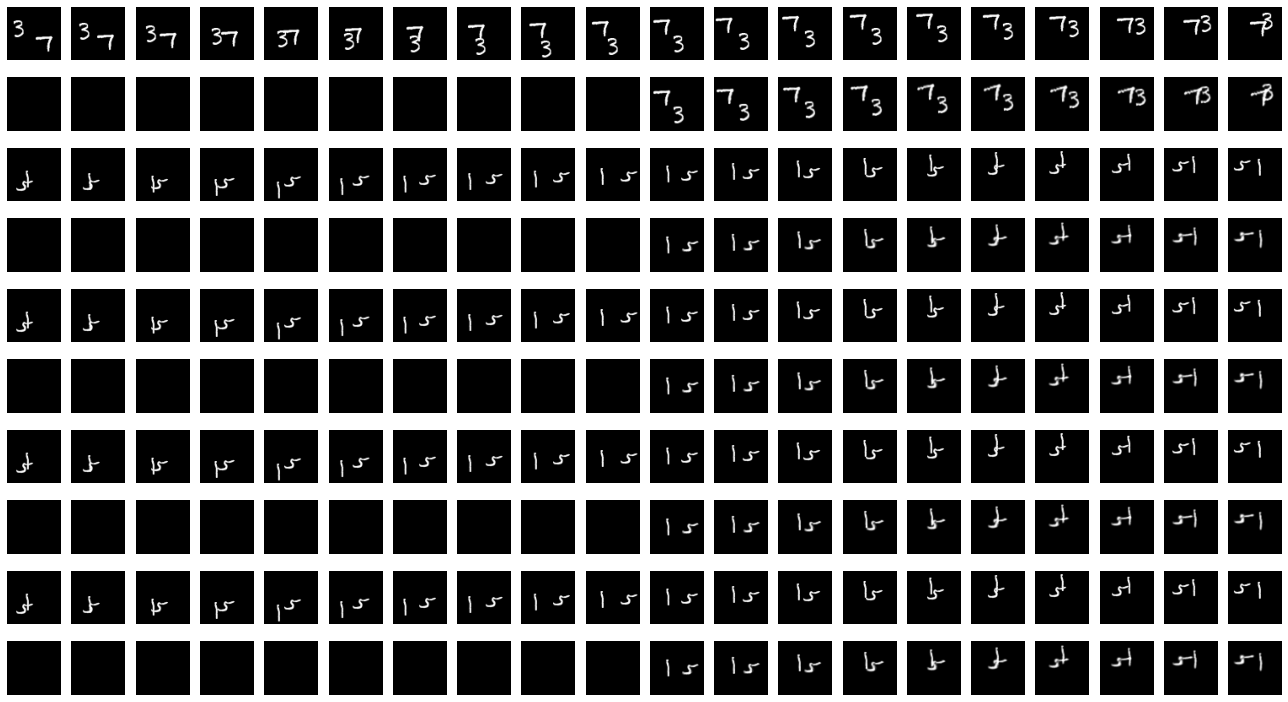

In [4]:
evaluation.visualize_best_metrices()

In [5]:
from utils.visualizations import save_grid_batch

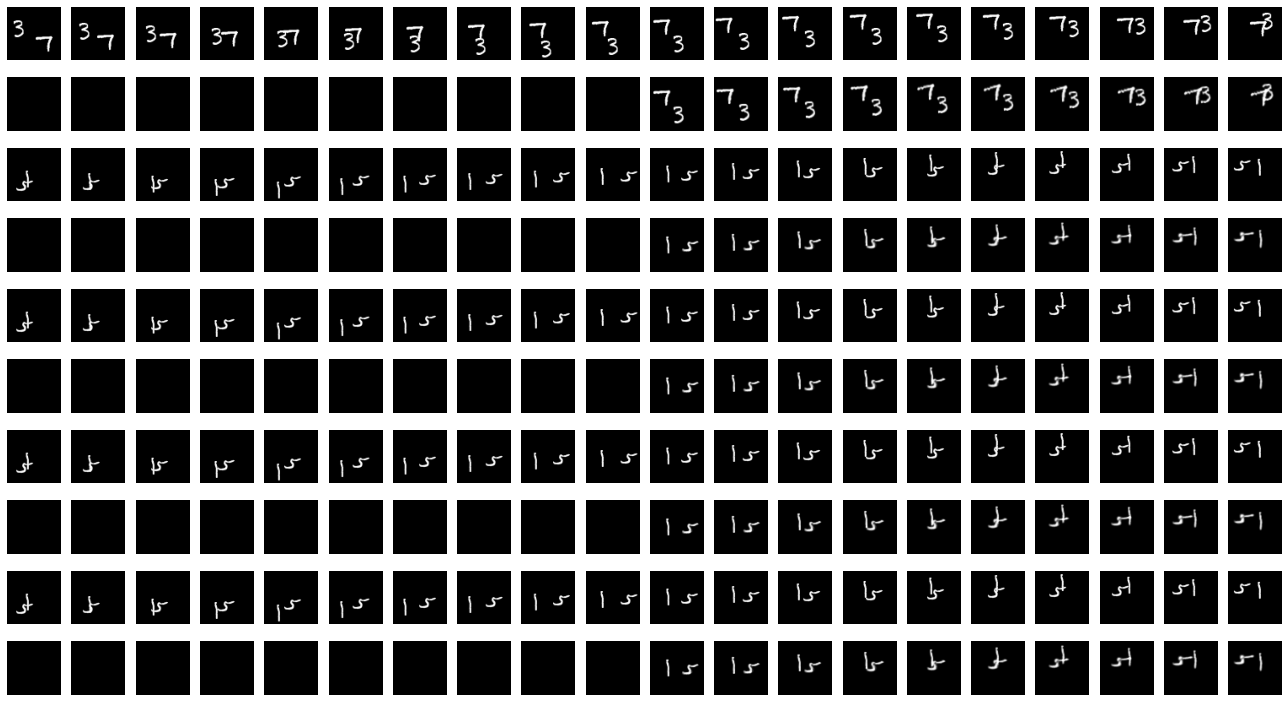

In [10]:
best_lpips_index = np.argmin(np.mean(evaluation.lpips_, axis=1))
best_ssim_index = np.argmax(np.mean(evaluation.ssim, axis=1))
best_psnr_index = np.argmax(np.mean(evaluation.psnr, axis=1))
best_mse_index = np.argmin(np.mean(evaluation.mse, axis=1))
best_mae_index = np.argmin(np.mean(evaluation.mae, axis=1))

indexes = [best_lpips_index, best_ssim_index, best_psnr_index, best_mse_index, best_mae_index]
gt = [torch.from_numpy(evaluation.eval_sequences[0][:,indx]) for indx in indexes]
gt = torch.stack(gt)

pred = [torch.from_numpy(evaluation.eval_sequences[1][:,indx]) for indx in indexes]
pred = torch.stack(pred)

save_grid_batch(gt, pred, batch_first= True,text = "best_metrices", show = True)

In [11]:
lpips_avg = np.mean(evaluation.lpips_, axis = 0)
ssim_avg = np.mean(evaluation.ssim, axis = 0)

In [13]:
s = np.stack((lpips_avg, ssim_avg, ssim_avg))
s.shape

(3, 10)

In [13]:
len(evaluation.eval_sequences)

2

In [17]:
evaluation.eval_sequences[0][:,10].shape

(20, 1, 64, 64)

In [9]:
array = np.zeros((4,3,3,3,3))
arr = np.zeros((4,1,3,3,3))

full = np.concatenate((array,arr),axis=1)
full.shape

(4, 4, 3, 3, 3)